### Imports

In [2]:
import pylidc as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collecting data using PyLIDC Library

### Creating a dataframe to store all the imformation

In [6]:
df = pd.DataFrame(columns= [
                            'patient_id', 
                            'scan_id',
                            'slice_thickness',
                            'pixel_spacing',

                            'annotation_id',
                            'subtlety', 
                            'internalStructure', 
                            'calcification', 
                            'sphericity', 
                            'margin', 
                            'lobulation', 
                            'spiculation', 
                            'texture', 
                            'malignancy',

                            'diameter',
                            'surface_area',
                            'volume',
                            ])

### Extracting the data

In [7]:
ann = pl.query(pl.Annotation).all()

for i in range(len(ann)):
    att  = dict((col, "") for col in df.columns)

    att['patient_id'] = ann[i].scan.patient_id
    att['scan_id'] = ann[i].scan.id

    st = pl.query(pl.Scan.slice_thickness).filter(pl.Scan.id == att['scan_id'])
    s = str(st[0])
    att['slice_thickness'] = float(s[1:4])
    ps = pl.query(pl.Scan.pixel_spacing).filter(pl.Scan.id == att['scan_id'])
    p = str(ps[0])
    att['pixel_spacing'] = float(p[1:5])

    att['annotation_id'] = ann[i].id  
    att['subtlety'] = ann[i].subtlety
    att['internalStructure'] = ann[i].internalStructure 
    att['calcification'] = ann[i].calcification 
    att['sphericity'] = ann[i].sphericity
    att['margin'] = ann[i].margin  
    att['lobulation'] = ann[i].lobulation
    att['spiculation'] = ann[i].spiculation 
    att['texture'] = ann[i].texture
    att['malignancy'] = ann[i].malignancy  

    att['diameter'] = ann[i].diameter
    att['surface_area'] = ann[i].surface_area
    att['volume'] = ann[i].volume

    df = df.append(att, ignore_index=True)


C:\Users\anton\AppData\Local\Temp\ipykernel_20892\2322864843.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(att, ignore_index=True)
C:\Users\anton\AppData\Local\Temp\ipykernel_20892\2322864843.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(att, ignore_index=True)
C:\Users\anton\AppData\Local\Temp\ipykernel_20892\2322864843.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(att, ignore_index=True)
C:\Users\anton\AppData\Local\Temp\ipykernel_20892\2322864843.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(att, ignore_index=True)
C:\Users\anton\AppData\Local\Tem

### Saving everything to a CSV file

In [8]:
df.to_csv('features.csv', sep=',', index=False)

# Exploring the data

### Fisrt glance ...

In [3]:
df = pd.read_csv('features.csv', index_col=False)

# making the target variable the last column in teh dataset
mal = df.malignancy
df = df.drop("malignancy",axis=1)
df["malignancy"] = mal

df.head()

,patient_id,scan_id,slice_thickness,pixel_spacing,annotation_id,subtlety,internalStructure,calcification,sphericity,margin,lobulation,spiculation,texture,diameter,surface_area,volume,malignancy
0,LIDC-IDRI-0078,1,3.0,0.65,1,5,1,6,3,4,1,1,5,20.840585,1124.125177,2439.30375,3
1,LIDC-IDRI-0078,1,3.0,0.65,2,4,1,6,4,4,1,2,5,19.500000,1135.239277,2621.82375,3
2,LIDC-IDRI-0078,1,3.0,0.65,3,5,1,4,3,5,2,3,5,23.300483,1650.898027,4332.31500,4
3,LIDC-IDRI-0078,1,3.0,0.65,4,5,1,6,4,2,4,1,5,32.810517,1994.684094,5230.33875,5
4,LIDC-IDRI-0078,1,3.0,0.65,5,4,1,6,4,2,3,1,4,20.891206,1130.172711,2443.74000,4


In [15]:
# Number of individual patients assessed in the data
patients = np.unique(df.patient_id)
print(len(patients))

875


### Visualizing the classes distribution from the target variable

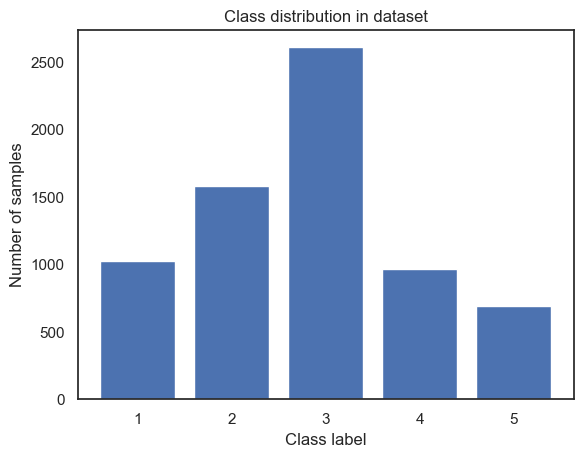

[1 2 3 4 5] [1020 1580 2606  962  691]


In [12]:
unique_labels, counts = np.unique(df.malignancy, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

print(unique_labels, counts)

### Starting by combining some of the target classes, like so:

     -1  -> 'Highly Unlikely'(1) and 'Moderately Unlikely'(2)
      0  -> 'Indeterminate'(3)
      1  -> 'Moderately Suspicious'(4) and 'Highly Suspicious'(5)

In [13]:
for i in range(len(df)):
    if df.malignancy[i] == 1 or df.malignancy[i] == 2:
        df.malignancy[i] = -1
    elif df.malignancy[i] == 4 or df.malignancy[i] == 5:
        df.malignancy[i] = 1
    else:
        df.malignancy[i] = 0

C:\Users\anton\AppData\Local\Temp\ipykernel_21160\1457914198.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.malignancy[i] = 0
C:\Users\anton\AppData\Local\Temp\ipykernel_21160\1457914198.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.malignancy[i] = 1
C:\Users\anton\AppData\Local\Temp\ipykernel_21160\1457914198.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.malignancy[i] = -1


### The new classes distribution

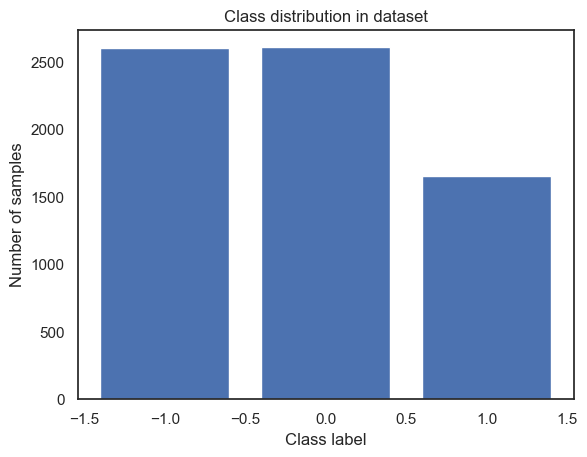

[-1  0  1] [2600 2606 1653]


In [14]:
sunique_labels, counts = np.unique(df.malignancy, return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Class distribution in dataset')
plt.show()

print(unique_labels, counts)

### Coorelation Matrix 

C:\Users\anton\AppData\Local\Temp\ipykernel_21160\2339716847.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

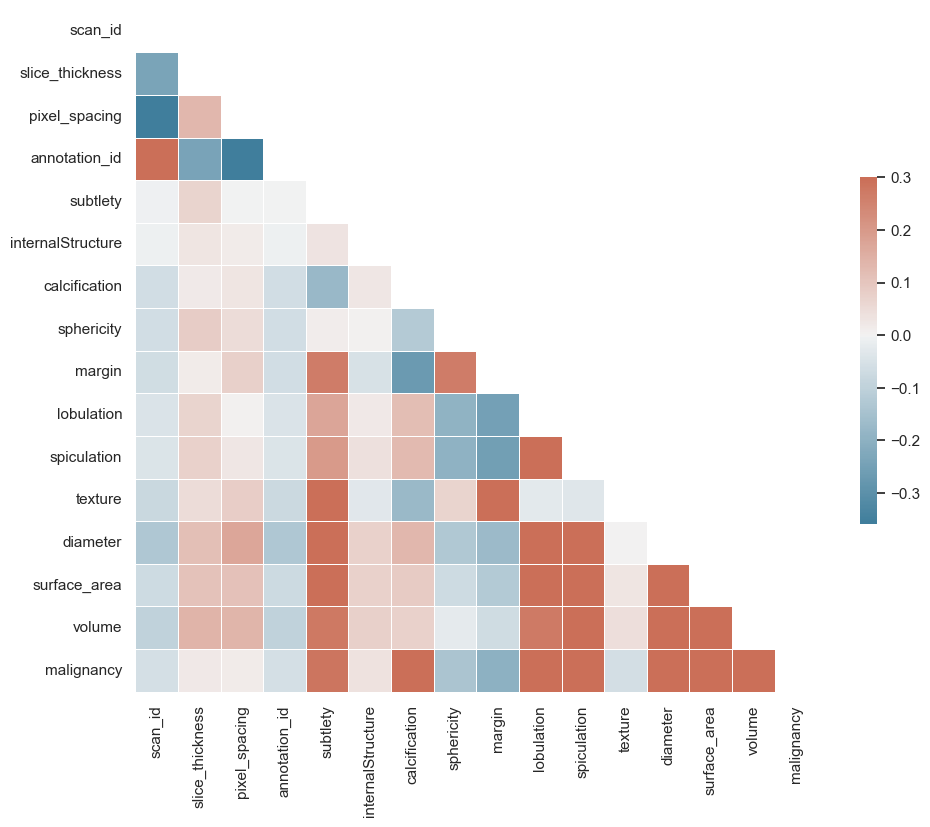

In [15]:
corr = df.corr()

sns.set_theme(style="white")
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Modeling

### Let's define the target variable

In [16]:
X = df.drop("malignancy",axis=1)
y = df["malignancy"] 